In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from pandas_datareader import data,wb

In [4]:
from datetime import datetime

In [5]:
from __future__ import division

In [6]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [7]:
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

In [8]:
for stock in tech_list:
    globals()[stock] = data.DataReader(stock, 'yahoo', start, end)

In [9]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,87.733014,85.290494,86.486561,86.583073,1.557403e+08,86.336433
std,20.350481,19.529871,20.134828,19.897003,7.121511e+07,20.048120
min,57.125000,53.152500,57.020000,56.092499,3.335450e+07,55.840385
25%,70.752502,69.430000,69.949997,70.004997,1.062344e+08,69.525352
50%,80.287498,79.000000,79.644997,79.712502,1.372808e+08,79.384369
75%,110.392502,106.089996,108.199997,108.220001,1.854388e+08,108.220001
max,137.979996,130.529999,137.589996,134.179993,4.268848e+08,134.179993


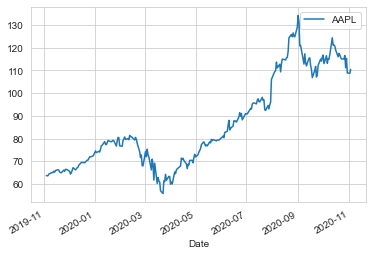

In [10]:
sns.set_style('whitegrid')
AAPL['Adj Close'].plot()
plt.legend(tech_list)

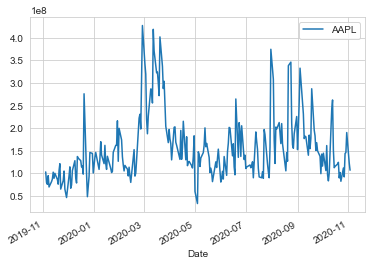

In [11]:
#The above graph shows the variation in the adjusted closed price of the tech giants

#Variation in Volume of stocks of tech giants 
AAPL['Volume'].plot()
plt.legend(tech_list)

In [12]:
#The above graph shows that volume of shares traded of Apple were the highest
#Shares traded of Amazon and Google were almost the same

#Calculating Moving Average of 3 days
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean()
    GOOG[column_name] = GOOG['Adj Close'].rolling(ma).mean()
    MSFT[column_name] = MSFT['Adj Close'].rolling(ma).mean()
    AMZN[column_name] = AMZN['Adj Close'].rolling(ma).mean()

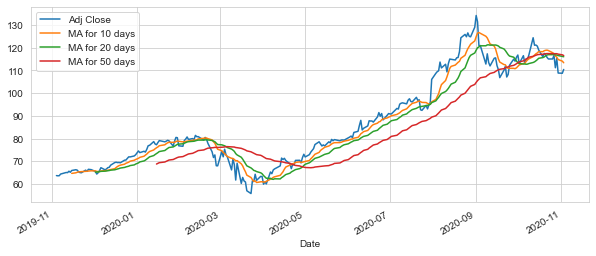

In [13]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

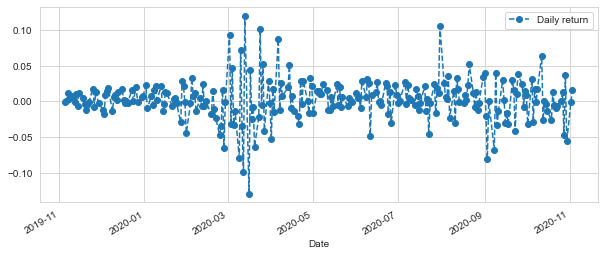

In [14]:
AAPL['Daily return'] = AAPL['Adj Close'].pct_change()
AAPL['Daily return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')

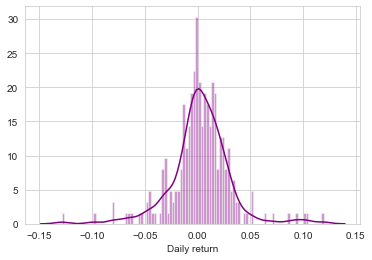

In [15]:
sns.distplot(AAPL['Daily return'].dropna(), bins=100, color='purple')

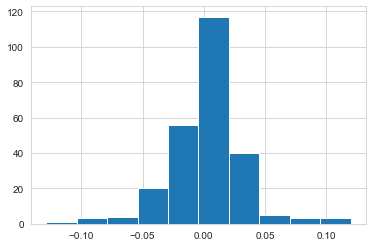

In [16]:
AAPL['Daily return'].hist()

In [17]:
closing_df = data.DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [18]:
closing_df.head(10)

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-11-04,63.742554,1291.369995,142.922897,1804.660034
2019-11-05,63.650970,1292.030029,142.833923,1801.709961
2019-11-06,63.678192,1291.800049,142.438400,1795.770020
2019-11-07,64.413116,1308.859985,142.636139,1788.199951
2019-11-08,64.589409,1311.369995,144.317017,1785.880005
2019-11-11,65.100876,1299.189941,144.465332,1771.650024
2019-11-12,65.041283,1298.800049,145.414520,1778.000000
2019-11-13,65.664490,1298.000000,145.651825,1753.109985
2019-11-14,65.210121,1311.459961,146.393372,1754.599976


In [19]:
tech_rets = closing_df.pct_change()

In [20]:
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-11-04,NaN,NaN,NaN,NaN
2019-11-05,-0.001437,0.000511,-0.000623,-0.001635
2019-11-06,0.000428,-0.000178,-0.002769,-0.003297
2019-11-07,0.011541,0.013206,0.001388,-0.004215
2019-11-08,0.002737,0.001918,0.011784,-0.001297


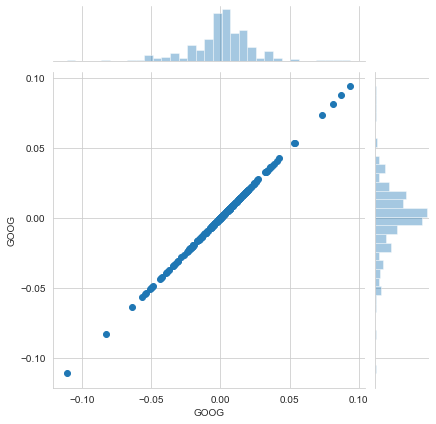

In [21]:
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter')

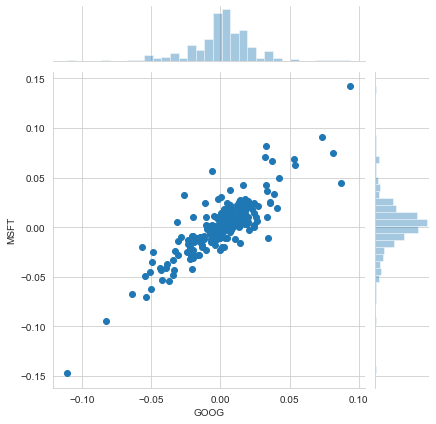

In [22]:
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter')

In [23]:
#The above graph is the correlation between the stocks of Google and Microsoft
tech_rets.head(5)

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-11-04,NaN,NaN,NaN,NaN
2019-11-05,-0.001437,0.000511,-0.000623,-0.001635
2019-11-06,0.000428,-0.000178,-0.002769,-0.003297
2019-11-07,0.011541,0.013206,0.001388,-0.004215
2019-11-08,0.002737,0.001918,0.011784,-0.001297


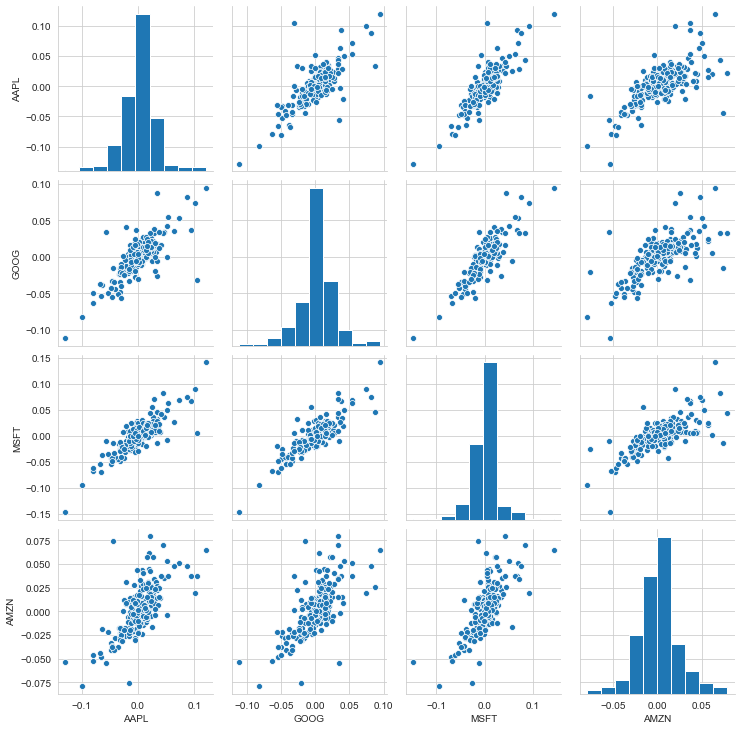

In [24]:
sns.pairplot(tech_rets.dropna())

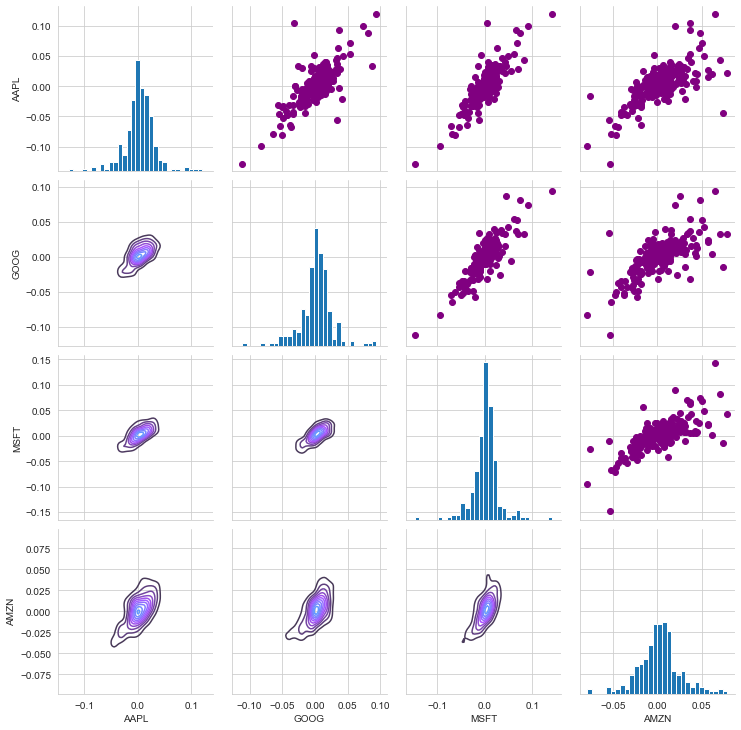

In [25]:
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter, color='purple')

returns_fig.map_lower(sns.kdeplot, cmap='cool_d')

returns_fig.map_diag(plt.hist, bins=30)

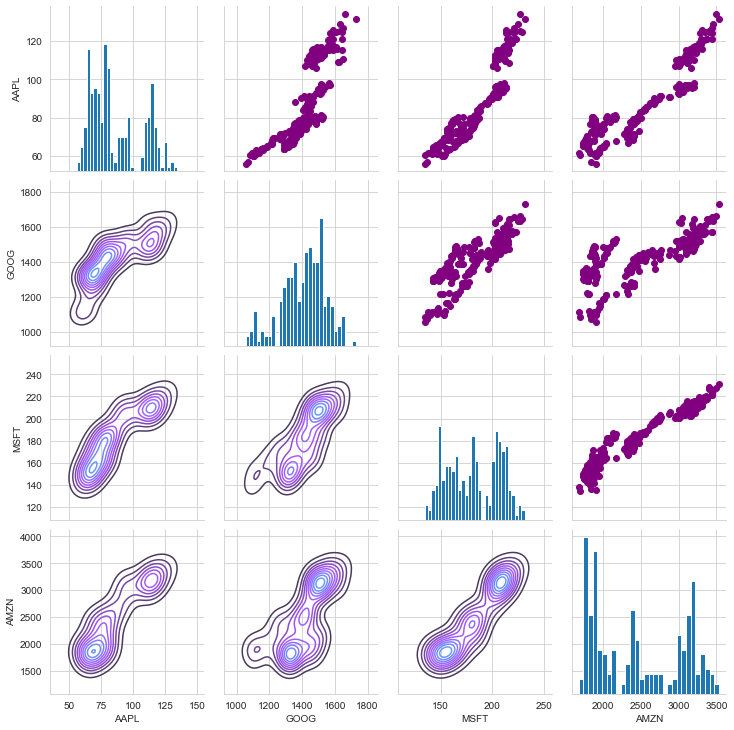

In [26]:
 returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter, color='purple')

returns_fig.map_lower(sns.kdeplot, cmap='cool_d')

returns_fig.map_diag(plt.hist, bins=30)

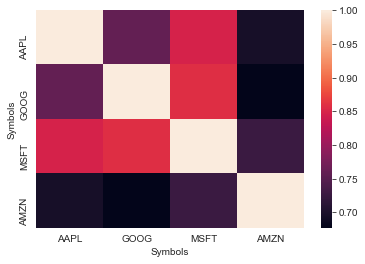

In [27]:
#The above graph shows the correlation between closing prices of the stocks
#The above graph shows that Microsoft and Amazon are strongly correlated

#Showing the Correlation graph between the stocks of the companies
corr = tech_rets.corr()
sns.heatmap(corr)

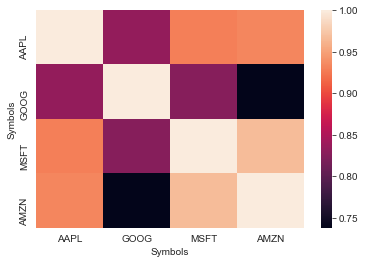

In [28]:
#The above graph shows the big correlation between Apple and Amazon, Apple and Google, Google and Amazon etc.
sns.heatmap(closing_df.corr())

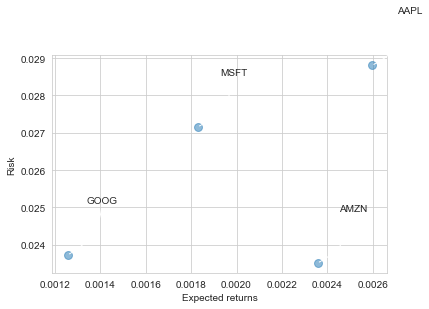

In [29]:
#The above graph shows that closing stock price of Google and Amazon are strongly correlated
rets = tech_rets.dropna()
area = np.pi*20

plt.scatter(rets.mean(), rets.std(), alpha=0.5, s=area)

plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label,x,y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label,
        xy=(x,y), xytext=(50,50),
        textcoords='offset points', ha='right', va='bottom',
        arrowprops=dict(arrowstyle='-', connectionstyle='arc3, rad=-0.3')
    )

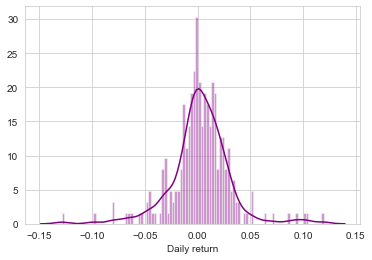

In [30]:
sns.distplot(AAPL['Daily return'].dropna(), bins=100, color='purple')

In [31]:
rets.head(5)

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-11-05,-0.001437,0.000511,-0.000623,-0.001635
2019-11-06,0.000428,-0.000178,-0.002769,-0.003297
2019-11-07,0.011541,0.013206,0.001388,-0.004215
2019-11-08,0.002737,0.001918,0.011784,-0.001297
2019-11-11,0.007919,-0.009288,0.001028,-0.007968


In [32]:
rets['AAPL'].quantile(0.05)    

-0.04486871629818763

In [33]:
#The above number shows that with 95% confidence we can lose atmost 4.49% money invested daily at worst.

days = 365
dt = 1/days

mu = rets.mean()['GOOG']
sigma = rets.std()['GOOG']

In [34]:
def stock_monte_carlo(start_price, days, mu, sigma):
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        shock[x] = np.random.normal(loc=mu*dt, scale=sigma*np.sqrt(dt))
        drift[x] = mu*dt
        
        price[x] = price[x-1] + (price[x-1]*(drift[x]+shock[x]))
    
    return price

In [35]:
GOOG.head(5)

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,,,,,,
2019-11-04,1294.130005,1276.354980,1276.449951,1291.369995,1501000,1291.369995,NaN,NaN,NaN
2019-11-05,1298.930054,1291.229004,1292.890015,1292.030029,1282700,1292.030029,NaN,NaN,NaN
2019-11-06,1293.729980,1282.500000,1289.459961,1291.800049,1152700,1291.800049,NaN,NaN,NaN
2019-11-07,1323.739990,1294.244995,1294.280029,1308.859985,2030000,1308.859985,NaN,NaN,NaN
2019-11-08,1318.000000,1304.364990,1305.280029,1311.369995,1251400,1311.369995,NaN,NaN,NaN


Text(0.5, 1.0, 'Monte Carlo Analysis for Google Stocks')

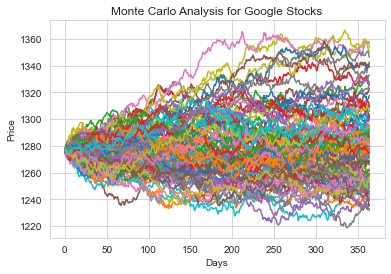

In [36]:
start_price = 1276.449951

for x in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google Stocks')

In [37]:
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price, days, mu, sigma)[days-1]

Text(0.5, 1.0, 'Final price distribution of Google stocks after 365 days')

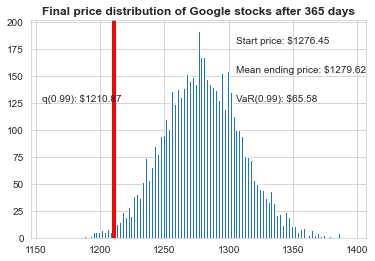

In [41]:
q = np.percentile(simulations,1)

plt.hist(simulations, bins=200)

#Starting price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)

#Mean ending value
plt.figtext(0.6, 0.7, s="Mean ending price: $%.2f" %simulations.mean())

#Varience of the price with 99% confidence interval
plt.figtext(0.6, 0.6, s="VaR(0.99): $%.2f" %(start_price-q,))

#Display in quantile
plt.figtext(0.15, 0.6, s="q(0.99): $%.2f" %q)

#Drawing line of 1% quartile result
plt.axvline(x=q, linewidth=4, color='r')

#Title of the graph
plt.title("Final price distribution of Google stocks after %s days" %days, weight='bold')

In [ ]:
#The above graph says that for an investment of $1276, you can lose atmost $65